# 6 CER Forest Structure Analysis Post Defense 
Digging deeper into the CHM, percent canopy cover, etc.

### Notebook contents 
* Copied from notebook 7 to start after the defense.
* Start addressing forest structure with BAF and DCE...
* Using the netcdf `v3_b` from notebook 1 in this folder (which includes extra rasters)

* Making a copy of `5_treatments_snow_b` and removing some plots and regrouping DCE to see the sensivity

created by Cassie Lumbrazo\
date: April 2024\
python environment: **raster**

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio
# import rasterstats
import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3_b.nc') 
ds

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/339)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

## Constants and Calculations to Run before any other sections

In [4]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

In [5]:
# First, just snow depth by DCE
# ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 100) # forest
# ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 200)
# ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 300)
# ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 400)
# ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 500) # large gaps

ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 100) # forest
ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 200)
ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 300)
ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 400)
ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 500) # large gaps

ds['hs_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 100) # forest
ds['hs_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 200)
ds['hs_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 300)
ds['hs_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 400)
ds['hs_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 500) # large gaps

In [6]:
# First, just snow depth by DCE
ds['hs_giulia_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 100) # forest
ds['hs_giulia_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 200)
ds['hs_giulia_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 300)
ds['hs_giulia_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 400)
ds['hs_giulia_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 500) # large gaps

ds['hs_giulia_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 100) # forest
ds['hs_giulia_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 200)
ds['hs_giulia_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 300)
ds['hs_giulia_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 400)
ds['hs_giulia_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 500) # large gaps

In [7]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_100_n'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_200_n'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_300_n'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_400_n'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_500_n'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_100_s'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_200_s'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_300_s'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_400_s'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_500_s'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_100_n_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_200_n_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_300_n_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_400_n_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_500_n_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_100_s_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_200_s_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_300_s_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_400_s_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_500_s_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

In [8]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_giulia_dce_rapid_reclass_100_n'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_giulia_dce_rapid_reclass_100_n_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

Now, check this for the sensitivity for each side of the ridge 

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


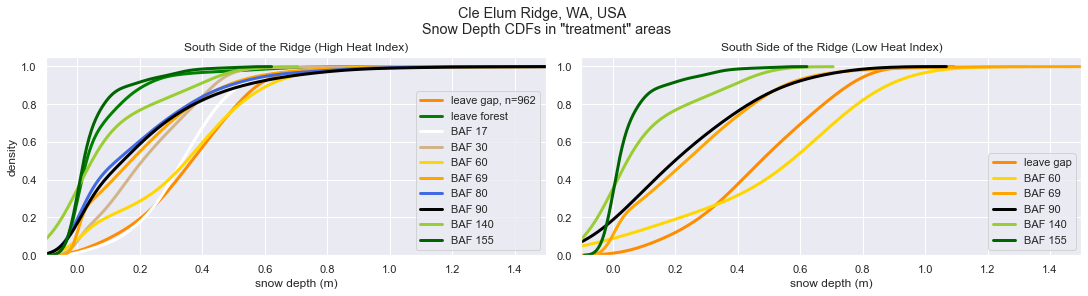

In [9]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 1 #high heat index
number2 = -1 #low heat index

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='tan', label='BAF 30', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')

# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='olive', label='BAF 150 (leave forest)', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('South Side of the Ridge (High Heat Index)')
axes[1].set_title('South Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

### Snow depth CDFs by DCE groups for north and south sides of the ridge

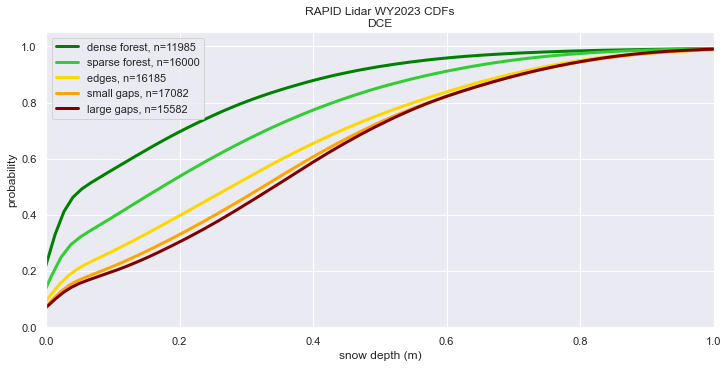

In [10]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(10,5), constrained_layout = True)

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100'].values.flatten(), color='green', label=f'dense forest, n={np.unique(ds["hs_dce_rapid_reclass_100"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200'].values.flatten(), color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300'].values.flatten(), color='gold', label=f'edges, n={np.unique(ds["hs_dce_rapid_reclass_300"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400'].values.flatten(), color='orange', label=f'small gaps, n={np.unique(ds["hs_dce_rapid_reclass_400"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500'].values.flatten(), color='maroon', label=f'large gaps, n={np.unique(ds["hs_dce_rapid_reclass_500"]).size}', cumulative=True, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023 CDFs\nDCE')
plt.xlabel('snow depth (m)')
plt.ylabel('probability')
plt.xlim(0,1)
# plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

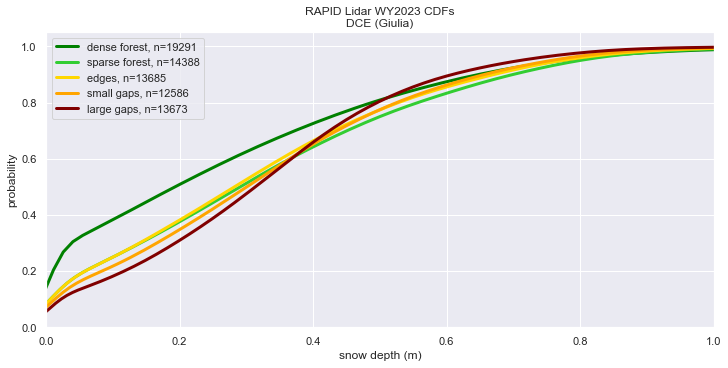

In [11]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(10,5), constrained_layout = True)

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100'].values.flatten(), color='green', label=f'dense forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_100"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200'].values.flatten(), color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300'].values.flatten(), color='gold', label=f'edges, n={np.unique(ds["hs_giulia_dce_rapid_reclass_300"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400'].values.flatten(), color='orange', label=f'small gaps, n={np.unique(ds["hs_giulia_dce_rapid_reclass_400"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500'].values.flatten(), color='maroon', label=f'large gaps, n={np.unique(ds["hs_giulia_dce_rapid_reclass_500"]).size}', cumulative=True, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023 CDFs\nDCE (Giulia)')
plt.xlabel('snow depth (m)')
plt.ylabel('probability')
plt.xlim(0,1)
# plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

The same plot, but by side of the ridge

Make this plot, but put south and north into two different plots

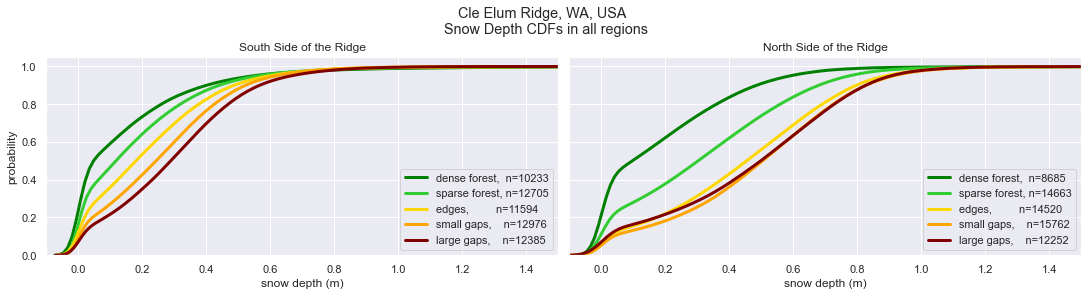

In [12]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[0], color='gold',      label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[0], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[0], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[1], color='gold',      label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[1], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[1], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"]).size}', cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions')
axes[0].legend()
axes[1].legend()
plt.show()

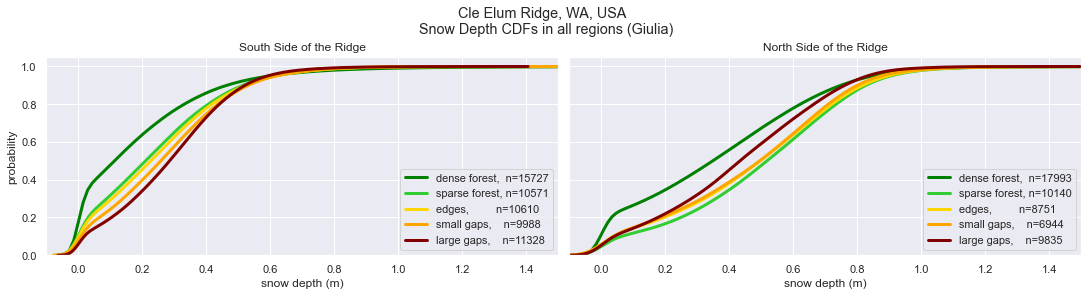

In [13]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green',     label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[0], color='gold',      label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[0], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[0], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[1], color='gold',      label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[1], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[1], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"]).size}', cumulative=True, linewidth=3)

# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions (Giulia)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

Now, let's make this for only the south side with high and low heat index (north too). so break up each my heat index as a secondary factor. 

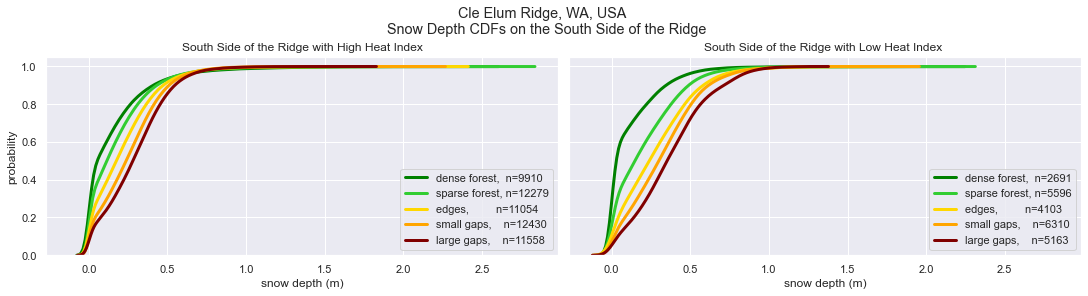

In [14]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the South Side of the Ridge')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge with High Heat Index')
axes[1].set_title('South Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

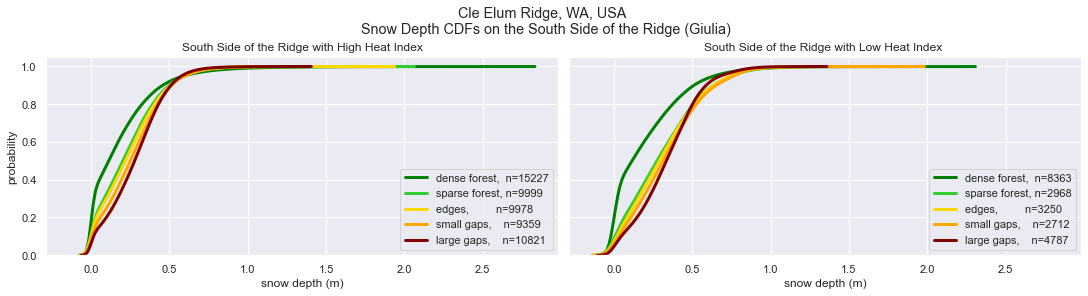

In [15]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the South Side of the Ridge (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge with High Heat Index')
axes[1].set_title('South Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

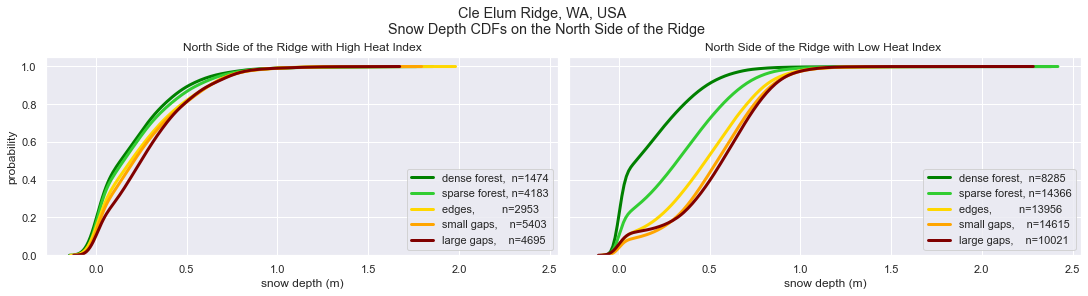

In [16]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the North Side of the Ridge')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('North Side of the Ridge with High Heat Index')
axes[1].set_title('North Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

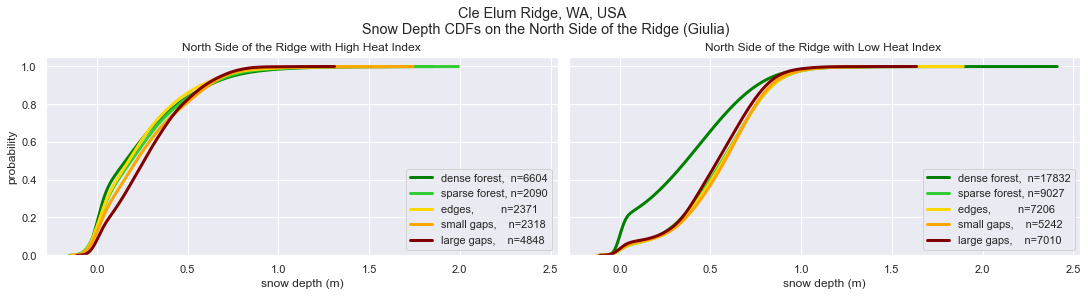

In [17]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the North Side of the Ridge (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('North Side of the Ridge with High Heat Index')
axes[1].set_title('North Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

## Now, going into each treatment and plotting the same thing

ds['hs_rapid_baf_new_1'] = ds['hs_rapid'].where(ds['baf_new'] == 1)\
ds['hs_rapid_baf_new_2'] = ds['hs_rapid'].where(ds['baf_new'] == 2)\
ds['hs_rapid_baf_new_17'] = ds['hs_rapid'].where(ds['baf_new'] == 17)\
ds['hs_rapid_baf_new_30'] = ds['hs_rapid'].where(ds['baf_new'] == 30)\
ds['hs_rapid_baf_new_32'] = ds['hs_rapid'].where(ds['baf_new'] == 32)\
ds['hs_rapid_baf_new_38'] = ds['hs_rapid'].where(ds['baf_new'] == 38)\
ds['hs_rapid_baf_new_60'] = ds['hs_rapid'].where(ds['baf_new'] == 60)\
ds['hs_rapid_baf_new_69'] = ds['hs_rapid'].where(ds['baf_new'] == 69)\
ds['hs_rapid_baf_new_80'] = ds['hs_rapid'].where(ds['baf_new'] == 80)\
ds['hs_rapid_baf_new_82'] = ds['hs_rapid'].where(ds['baf_new'] == 82)\
ds['hs_rapid_baf_new_90'] = ds['hs_rapid'].where(ds['baf_new'] == 90)\
ds['hs_rapid_baf_new_92'] = ds['hs_rapid'].where(ds['baf_new'] == 92)\
ds['hs_rapid_baf_new_140'] = ds['hs_rapid'].where(ds['baf_new'] == 140)\
ds['hs_rapid_baf_new_150'] = ds['hs_rapid'].where(ds['baf_new'] == 150)\
ds['hs_rapid_baf_new_155'] = ds['hs_rapid'].where(ds['baf_new'] == 155)\

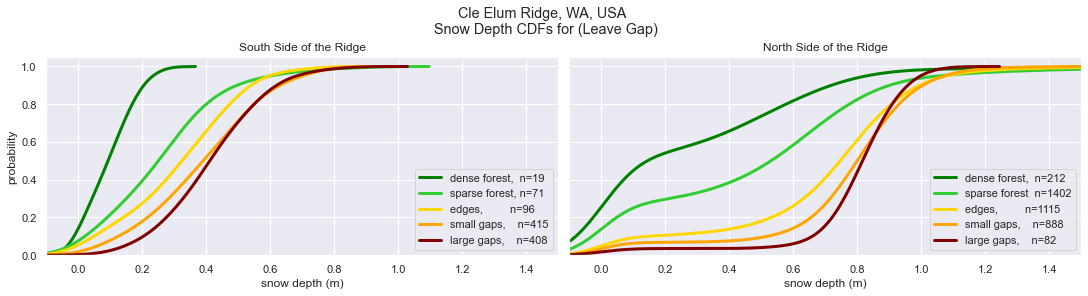

In [18]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 1)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 1)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Gap)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

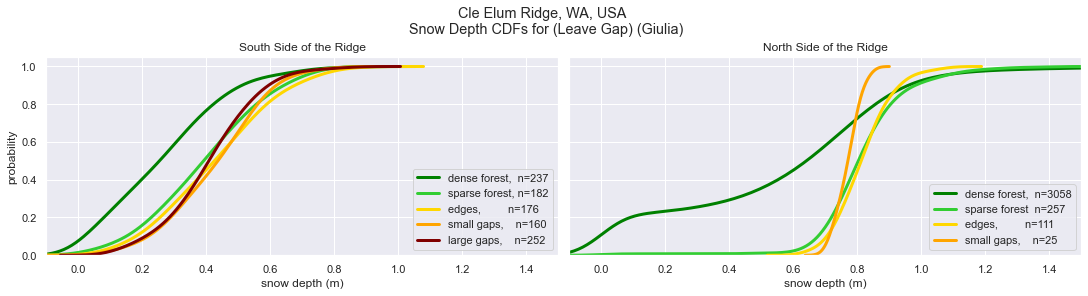

In [19]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 1)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 1)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Gap) (Giulia)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

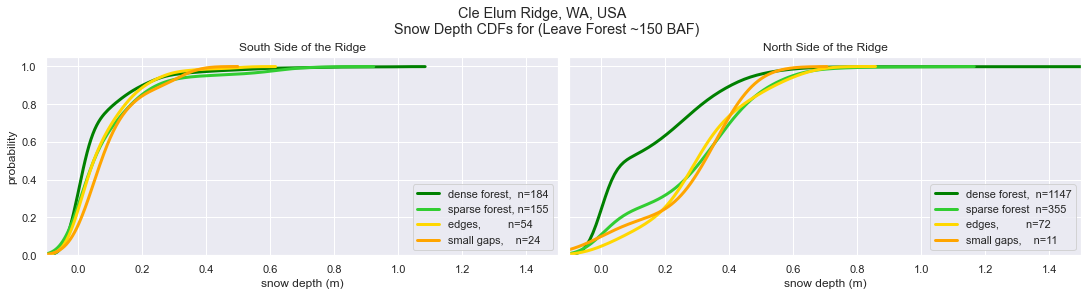

In [20]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 2)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 2)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 150)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 150)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 150)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 150)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 150)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Forest ~150 BAF)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


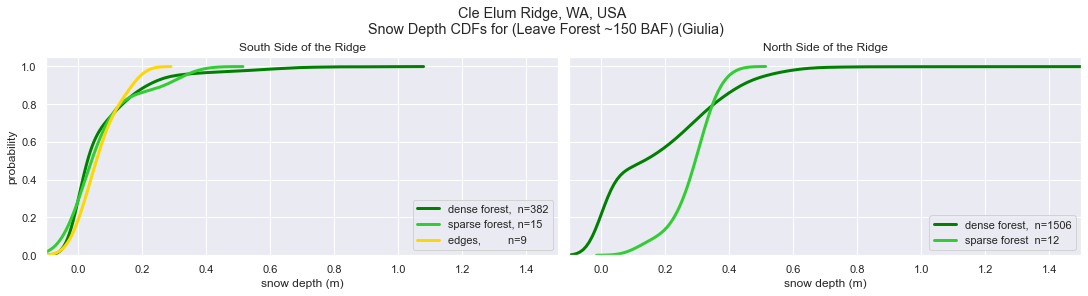

In [21]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 2)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 2)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 150)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 150)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 150)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 150)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 150)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Forest ~150 BAF) (Giulia)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

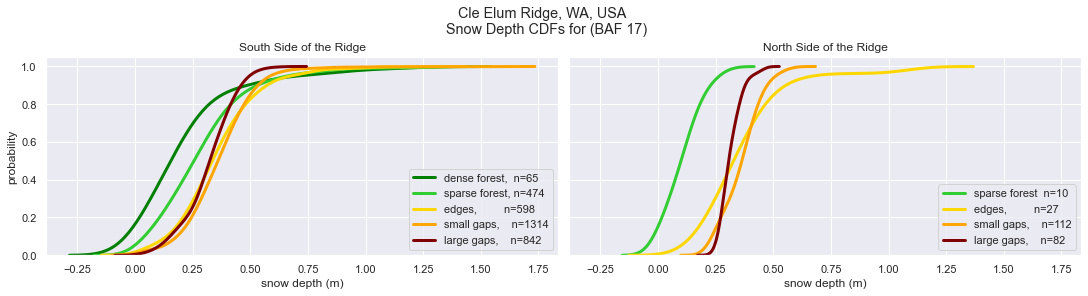

In [22]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 17
number2 = 17
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 17)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

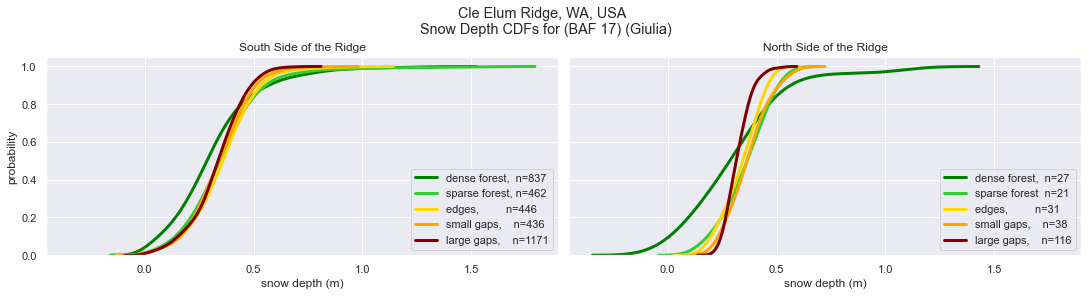

In [23]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 17
number2 = 17
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 17) (Giulia)')


# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

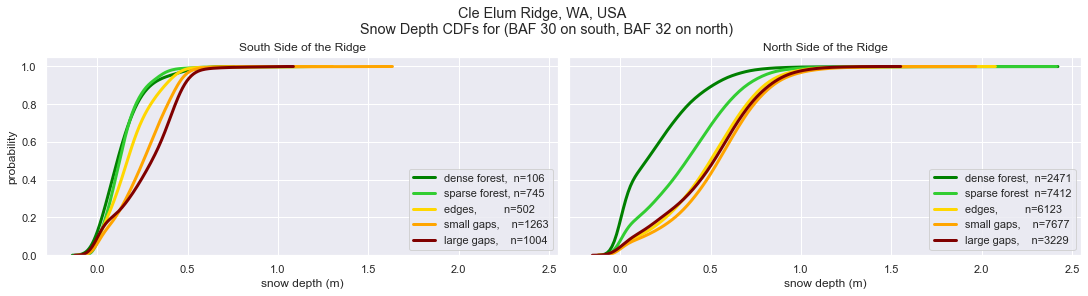

In [24]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 30
number2 = 32
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 30 on south, BAF 32 on north)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

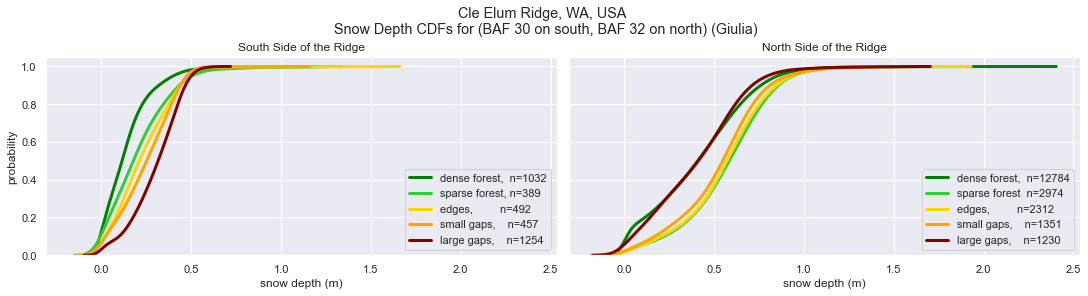

In [25]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 30
number2 = 32
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 30 on south, BAF 32 on north) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


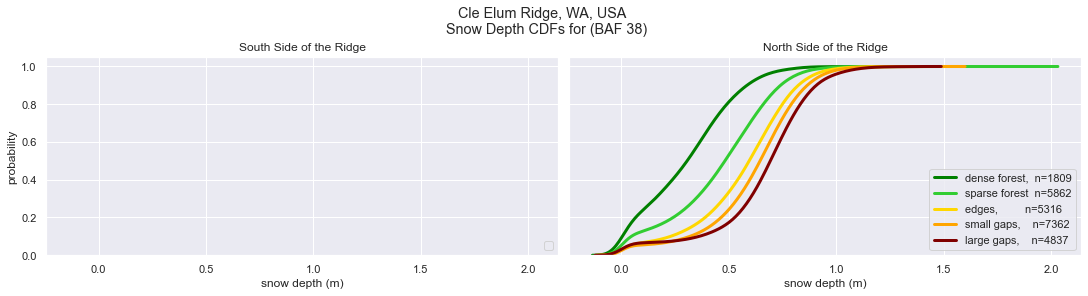

In [26]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 38
number2 = 38
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

Out of curiousity, check the heat index sensitivty on this BAF 38 on the north side, and on the large BAF69 on the south side. 

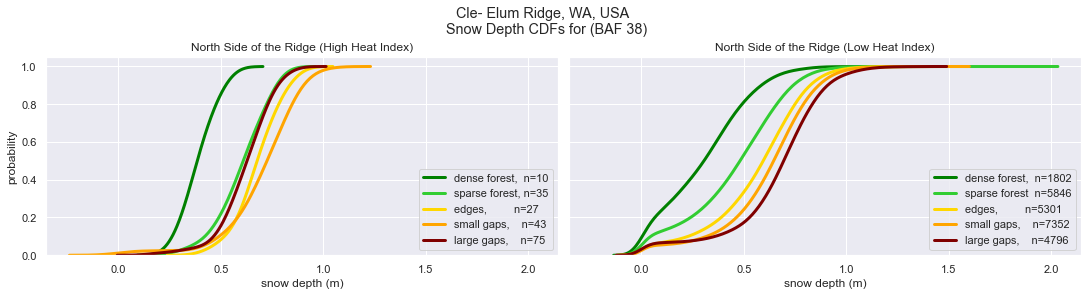

In [27]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 38
number2 = 38
plt. suptitle('Cle- Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('North Side of the Ridge (High Heat Index)')
axes[1].set_title('North Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


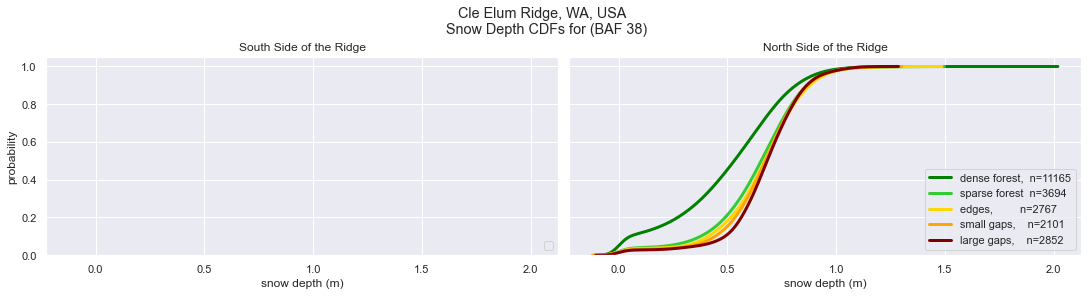

In [28]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 38
number2 = 38
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


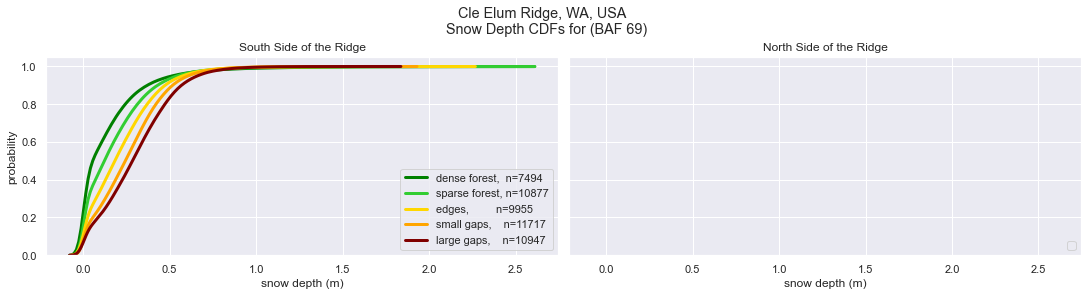

In [29]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 69
number2 = 69
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 69)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

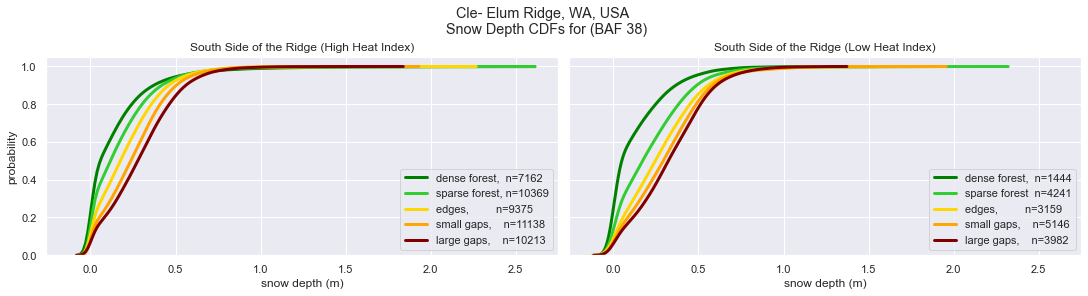

In [30]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 69
number2 = 69
plt. suptitle('Cle- Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge (High Heat Index)')
axes[1].set_title('South Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


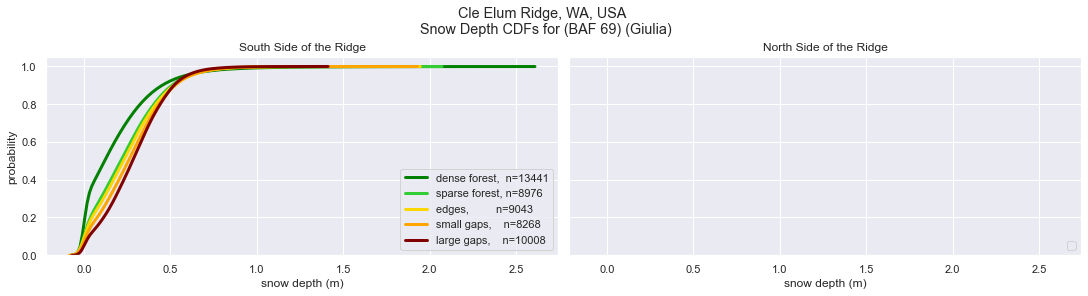

In [31]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 69
number2 = 69
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 69) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

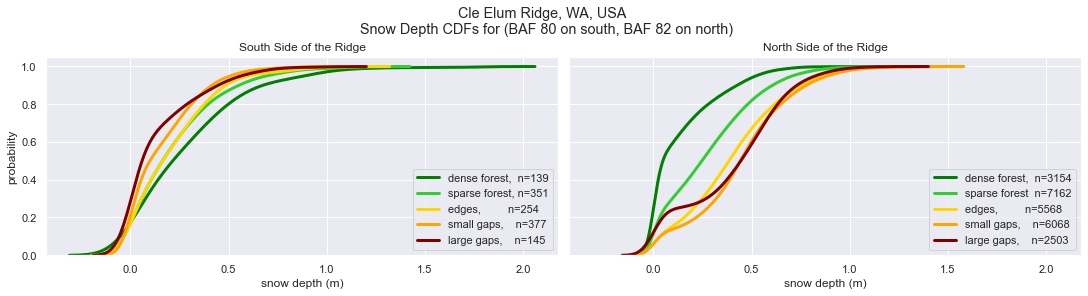

In [32]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 80
number2 = 82
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 80 on south, BAF 82 on north)')   

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

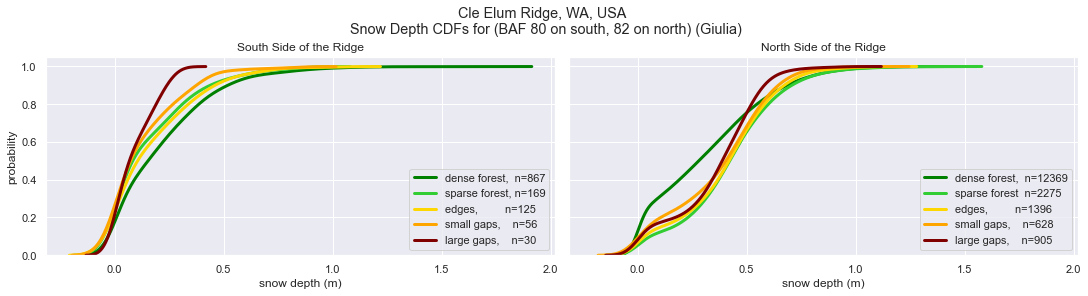

In [33]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 80
number2 = 82
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 80 on south, 82 on north) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


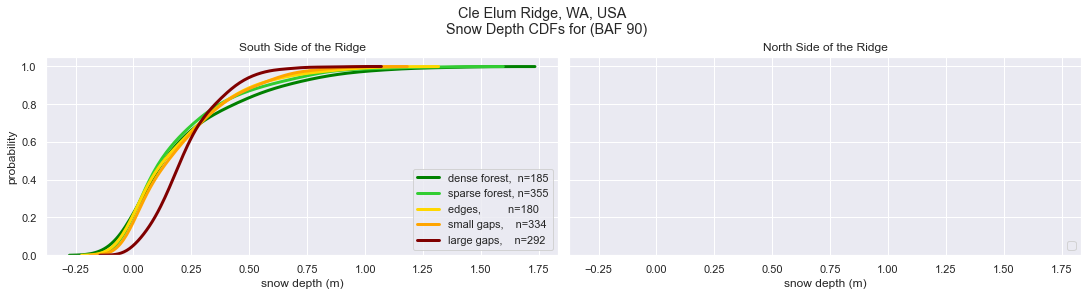

In [34]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 90
number2 = 90
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 90)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


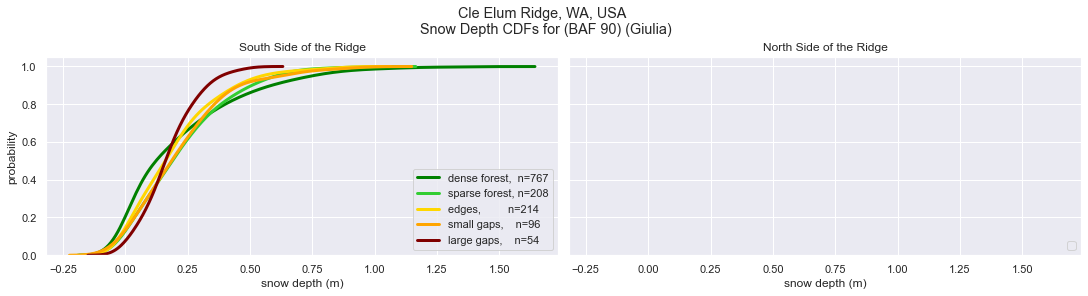

In [35]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 90
number2 = 90
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 90) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

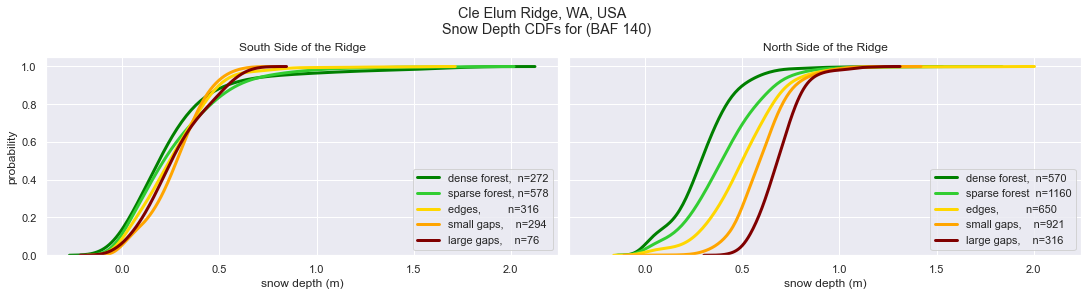

In [36]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 140
number2 = 140
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 140)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

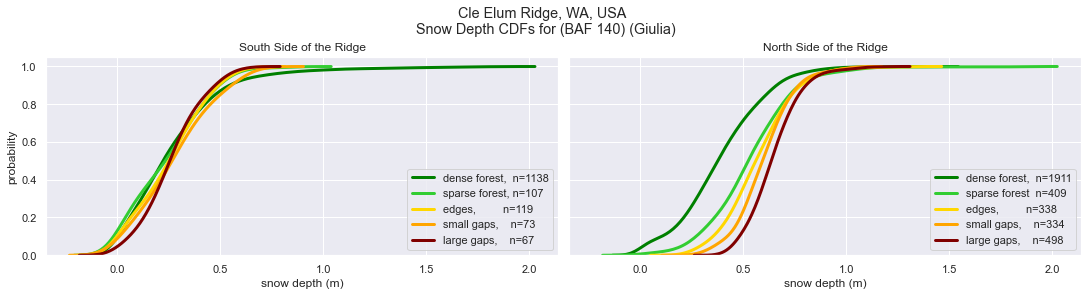

In [37]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 140
number2 = 140
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 140) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


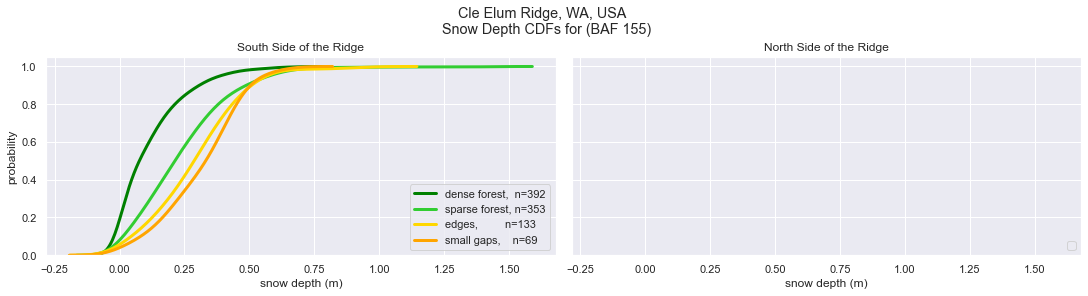

In [38]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 155
number2 = 155
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 155)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


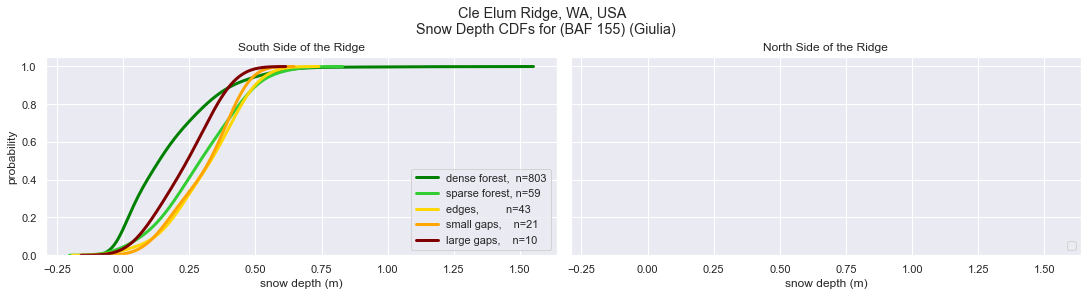

In [39]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 155
number2 = 155
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 155) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

Do the same by DAH just to compare with the side of the ridge plot...

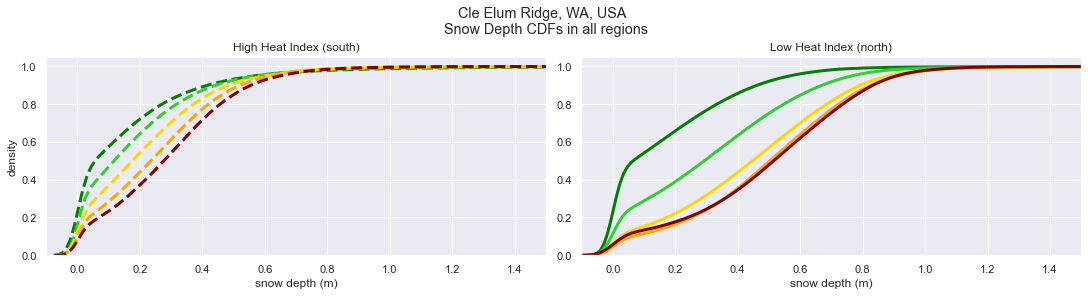

In [40]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s_dah'].values.flatten(), ax=axes[0], color='green', label='dense forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s_dah'].values.flatten(), ax=axes[0], color='limegreen', label='sparse forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s_dah'].values.flatten(), ax=axes[0], color='gold', label='edges', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s_dah'].values.flatten(), ax=axes[0], color='orange', label='small gaps', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s_dah'].values.flatten(), ax=axes[0], color='maroon', label='large gaps', cumulative=True, linewidth=3, linestyle='dashed')

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n_dah'].values.flatten(), ax=axes[1], color='green', label='dense forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n_dah'].values.flatten(), ax=axes[1], color='limegreen', label='sparse forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n_dah'].values.flatten(), ax=axes[1], color='gold', label='edges', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n_dah'].values.flatten(), ax=axes[1], color='orange', label='small gaps', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n_dah'].values.flatten(), ax=axes[1], color='maroon', label='large gaps', cumulative=True, linewidth=3)


# labels
axes[0].set_title('High Heat Index (south)')
axes[1].set_title('Low Heat Index (north)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions')
# plt.legend()
plt.show()

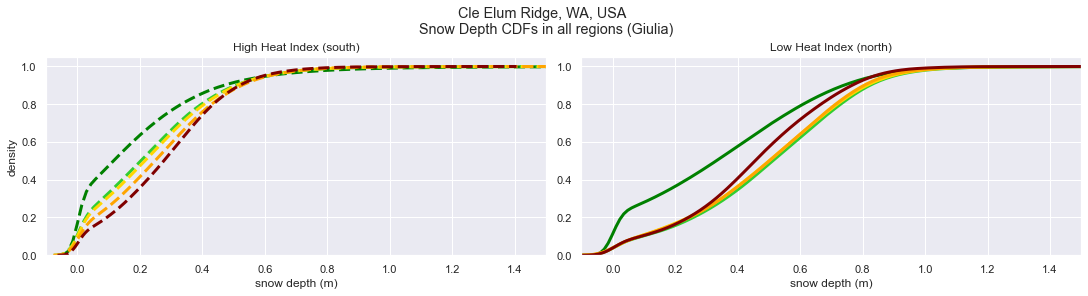

In [41]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s_dah'].values.flatten(), ax=axes[0], color='green', label='dense forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s_dah'].values.flatten(), ax=axes[0], color='limegreen', label='sparse forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s_dah'].values.flatten(), ax=axes[0], color='gold', label='edges', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s_dah'].values.flatten(), ax=axes[0], color='orange', label='small gaps', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s_dah'].values.flatten(), ax=axes[0], color='maroon', label='large gaps', cumulative=True, linewidth=3, linestyle='dashed')

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n_dah'].values.flatten(), ax=axes[1], color='green', label='dense forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n_dah'].values.flatten(), ax=axes[1], color='limegreen', label='sparse forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n_dah'].values.flatten(), ax=axes[1], color='gold', label='edges', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n_dah'].values.flatten(), ax=axes[1], color='orange', label='small gaps', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n_dah'].values.flatten(), ax=axes[1], color='maroon', label='large gaps', cumulative=True, linewidth=3)


# labels
axes[0].set_title('High Heat Index (south)')
axes[1].set_title('Low Heat Index (north)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions (Giulia)')
# plt.legend()
plt.show()

In [42]:
# drop all data where gaps are bigger than 30 m 
ds2 = ds.where(ds['giulia_dce_rapid'] < 30)
ds2 = ds2.where(ds2['giulia_dce_rapid'] > -40)

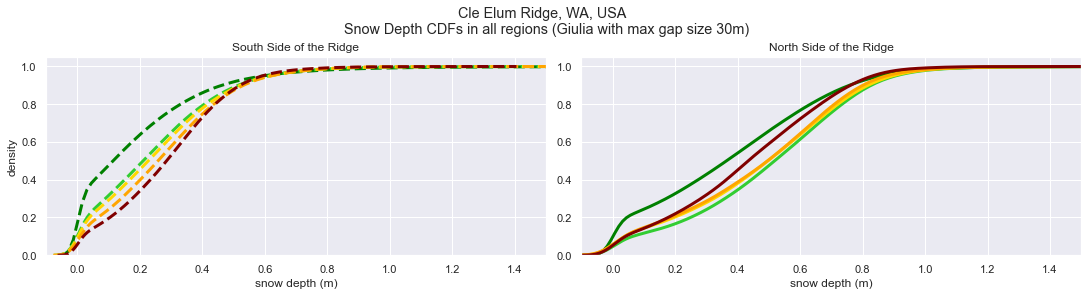

In [43]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green', label='dense forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[0], color='limegreen', label='sparse forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[0], color='gold', label='edges', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[0], color='orange', label='small gaps', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[0], color='maroon', label='large gaps', cumulative=True, linewidth=3, linestyle='dashed')

sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green', label='dense forest', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1], color='limegreen', label='sparse forest', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[1], color='gold', label='edges', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[1], color='orange', label='small gaps', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[1], color='maroon', label='large gaps', cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions (Giulia with max gap size 30m)')
# plt.legend()
plt.show()

## Changing the size of the groups to look at DCE with snow depth...

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_1492\863881095.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


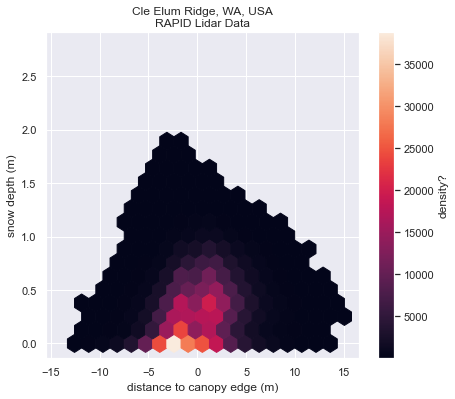

In [44]:
plt.figure(figsize=(7,6))

plt.hexbin(ds['dce_rapid'].values.flatten(), ds['hs_rapid'].values.flatten(), gridsize=20, mincnt=10,
          #C=snowdepth_flat, cmap='Blues', vmin=0, vmax=8,
          )

cb = plt.colorbar()
cb.set_label('density?')

plt.xlabel('distance to canopy edge (m)')
plt.ylabel('snow depth (m)')
# plt.xlim([-10,10])
# plt.ylim([-0.05, 2])

plt.title('Cle Elum Ridge, WA, USA\nRAPID Lidar Data')
plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_1492\967335185.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


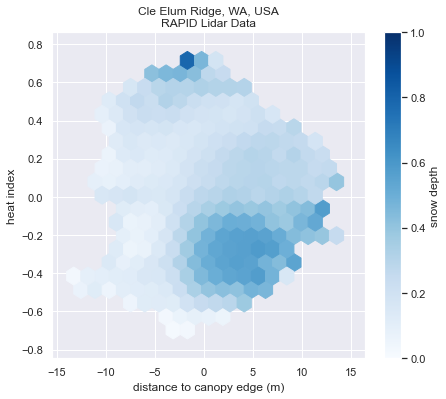

In [45]:
plt.figure(figsize=(7,6))

plt.hexbin(ds['dce_rapid'].values.flatten(), ds['dah'].values.flatten(), gridsize=20, mincnt=20,
          C=ds['hs_rapid'].values.flatten(), cmap='Blues', vmin=0, vmax=1,
          )

cb = plt.colorbar()
cb.set_label('snow depth')

plt.xlabel('distance to canopy edge (m)')
plt.ylabel('heat index')
# plt.xlim([-10,10])
# plt.ylim([-0.05, 2])

plt.title('Cle Elum Ridge, WA, USA\nRAPID Lidar Data')
plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_1492\1735931147.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


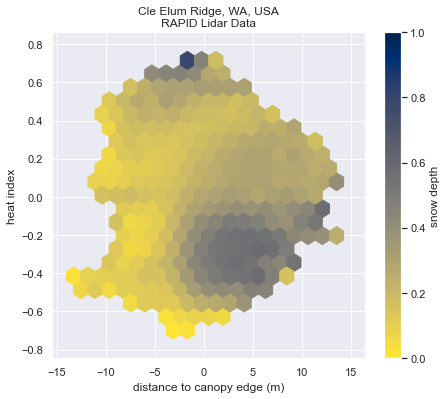

In [46]:
plt.figure(figsize=(7,6))

plt.hexbin(ds['dce_rapid'].values.flatten(), ds['dah'].values.flatten(), gridsize=20, mincnt=20,
          C=ds['hs_rapid'].values.flatten(), cmap='cividis_r', vmin=0, vmax=1,
          )

cb = plt.colorbar()
cb.set_label('snow depth')

plt.xlabel('distance to canopy edge (m)')
plt.ylabel('heat index')
# plt.xlim([-10,10])
# plt.ylim([-0.05, 2])

plt.title('Cle Elum Ridge, WA, USA\nRAPID Lidar Data')
plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_1492\3305569109.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


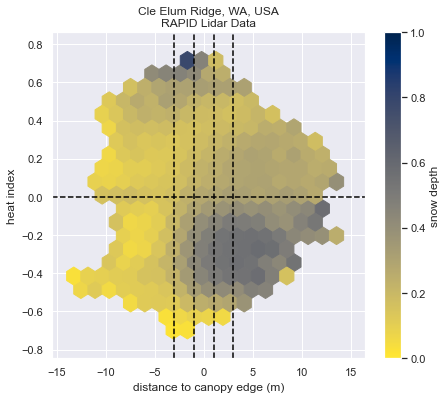

In [47]:
plt.figure(figsize=(7,6))

plt.hexbin(ds['dce_rapid'].values.flatten(), ds['dah'].values.flatten(), gridsize=20, mincnt=20,
          C=ds['hs_rapid'].values.flatten(), cmap='cividis_r', vmin=0, vmax=1,
          )

# add verticle and horizontal lines to this plot 
plt.axhline(y=0, color='black', linestyle='--') # head index binary line

plt.axvline(x=3, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')

plt.axvline(x=-1, color='black', linestyle='--')
plt.axvline(x=-3, color='black', linestyle='--')


cb = plt.colorbar()
cb.set_label('snow depth')

plt.xlabel('distance to canopy edge (m)')
plt.ylabel('heat index')
# plt.xlim([-10,10])
# plt.ylim([-0.05, 2])

plt.title('Cle Elum Ridge, WA, USA\nRAPID Lidar Data')
plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_1492\2096728127.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


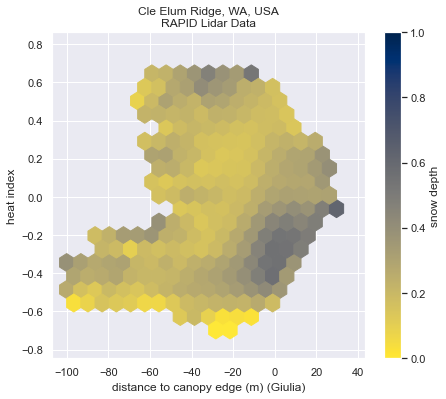

In [48]:
plt.figure(figsize=(7,6))

plt.hexbin(ds['giulia_dce_rapid'].values.flatten(), ds['dah'].values.flatten(), gridsize=20, mincnt=20,
          C=ds['hs_rapid'].values.flatten(), cmap='cividis_r', vmin=0, vmax=1,
          )

cb = plt.colorbar()
cb.set_label('snow depth')

plt.xlabel('distance to canopy edge (m) (Giulia)')
plt.ylabel('heat index')
# plt.xlim([-10,10])
# plt.ylim([-0.05, 2])

plt.title('Cle Elum Ridge, WA, USA\nRAPID Lidar Data')
plt.show()

In [49]:
# here is the previous code to define DCE groups 
# dce_reclass = ds['dce_rapid'].copy(deep=True) # where cond = False, replace (unless we use the ~)                                

# dce_reclass = dce_reclass.where(~(dce_reclass > 30), drop=True)                       # droping any gaps that are bigger than 20
# dce_reclass = dce_reclass.where(~(( 3 <  dce_reclass) & (dce_reclass <=  60)), 500) # group 1: Large Gaps      3 <  DCE <=  20
# dce_reclass = dce_reclass.where(~(( 1 <  dce_reclass) & (dce_reclass <=  3)), 400) # group 2: Small Gaps      1 <  DCE <=  3
# dce_reclass = dce_reclass.where(~((-1 <= dce_reclass) & (dce_reclass <=  1)), 300) # group 3: Edges          -1 <= DCE <=  1
# dce_reclass = dce_reclass.where(~((-3 <= dce_reclass) & (dce_reclass <  -1)), 200) # group 4: Small Clusters -3 <= DCE <=  1
# dce_reclass = dce_reclass.where(~(dce_reclass <-3), 100)                           # group 5: Large Clusters       DCE <= -3

# ds['dce_rapid_reclass'] = dce_reclass.copy(deep=True)

# # Also saving these into the xarray dataframe, then else is nan for each group 
# # only for my dce classification, but Giulia's for now 
# ds['dce_rapid_largeclusters'] = ds.dce_rapid_reclass.where(ds.dce_rapid_reclass == 100)
# ds['dce_rapid_smallclusters'] = ds.dce_rapid_reclass.where(ds.dce_rapid_reclass == 200)
# ds['dce_rapid_canopyedges']   = ds.dce_rapid_reclass.where(ds.dce_rapid_reclass == 300)
# ds['dce_rapid_smallgaps']     = ds.dce_rapid_reclass.where(ds.dce_rapid_reclass == 400)
# ds['dce_rapid_largegaps']     = ds.dce_rapid_reclass.where(ds.dce_rapid_reclass == 500)

Let's keep edges the same, and make small gaps from 1 to 5, then large gaps > 5 

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_1492\2532994441.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


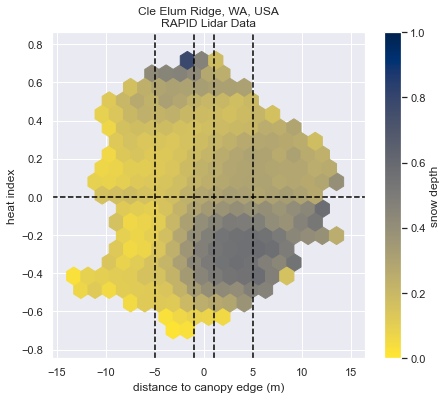

In [50]:
plt.figure(figsize=(7,6))

plt.hexbin(ds['dce_rapid'].values.flatten(), ds['dah'].values.flatten(), gridsize=20, mincnt=20,
          C=ds['hs_rapid'].values.flatten(), cmap='cividis_r', vmin=0, vmax=1,
          )

# add verticle and horizontal lines to this plot 
plt.axhline(y=0, color='black', linestyle='--') # head index binary line

plt.axvline(x=5, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')

plt.axvline(x=-1, color='black', linestyle='--')
plt.axvline(x=-5, color='black', linestyle='--')


cb = plt.colorbar()
cb.set_label('snow depth')

plt.xlabel('distance to canopy edge (m)')
plt.ylabel('heat index')
# plt.xlim([-10,10])
# plt.ylim([-0.05, 2])

plt.title('Cle Elum Ridge, WA, USA\nRAPID Lidar Data')
plt.show()

## Changing DCE Group Sizes

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_1492\1402766143.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


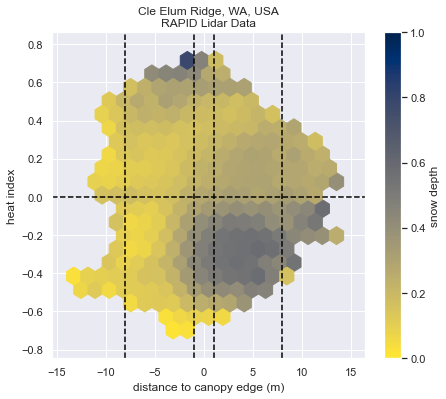

In [91]:
plt.figure(figsize=(7,6))

plt.hexbin(ds['dce_rapid'].values.flatten(), ds['dah'].values.flatten(), gridsize=20, mincnt=20,
          C=ds['hs_rapid'].values.flatten(), cmap='cividis_r', vmin=0, vmax=1,
          )

# add verticle and horizontal lines to this plot 
plt.axhline(y=0, color='black', linestyle='--') # head index binary line

plt.axvline(x=8, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')

plt.axvline(x=-1, color='black', linestyle='--')
plt.axvline(x=-8, color='black', linestyle='--')


cb = plt.colorbar()
cb.set_label('snow depth')

plt.xlabel('distance to canopy edge (m)')
plt.ylabel('heat index')
# plt.xlim([-10,10])
# plt.ylim([-0.05, 2])

plt.title('Cle Elum Ridge, WA, USA\nRAPID Lidar Data')
plt.show()

In [85]:
dce_reclass = ds['dce_rapid'].copy(deep=True) # where cond = False, replace (unless we use the ~)  

# previously was 3m with Giulia, tried 5m, and now trying 7m                             

dce_reclass = dce_reclass.where(~(( 8 <  dce_reclass) & (dce_reclass <=  60)), 500) # group 1: Large Gaps     5 <  DCE <=  20
dce_reclass = dce_reclass.where(~(( 1 <  dce_reclass) & (dce_reclass <=  8)), 400) # group 2: Small Gaps      1 <  DCE <=  5
dce_reclass = dce_reclass.where(~((-1 <= dce_reclass) & (dce_reclass <=  1)), 300) # group 5: Edges          -1 <= DCE <=  1
dce_reclass = dce_reclass.where(~((-8 <= dce_reclass) & (dce_reclass <  -1)), 200) # group 4: Small Clusters -5 <= DCE <=  1
dce_reclass = dce_reclass.where(~(dce_reclass <-8), 100)                           # group 5: Large Clusters       DCE <= -5

ds['dce_rapid_reclass_2'] = dce_reclass.copy(deep=True)

In [86]:
# first define the hs for each dce group
ds['hs_dce_rapid_reclass_2_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 100) # forest
ds['hs_dce_rapid_reclass_2_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 200)
ds['hs_dce_rapid_reclass_2_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 300)
ds['hs_dce_rapid_reclass_2_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 400)
ds['hs_dce_rapid_reclass_2_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 500) # large gaps

# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_2_100_n'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['baf_ridge'] == -1) #baf_ridge
ds['hs_dce_rapid_reclass_2_200_n'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_2_300_n'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_2_400_n'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_2_500_n'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_2_100_s'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_200_s'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_300_s'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_400_s'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_500_s'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_2_100_n_dah'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['dah_binary'] == -1) #dah_binary
ds['hs_dce_rapid_reclass_2_200_n_dah'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_2_300_n_dah'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_2_400_n_dah'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_2_500_n_dah'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_2_100_s_dah'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_200_s_dah'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_300_s_dah'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_400_s_dah'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_500_s_dah'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['dah_binary'] ==  1)

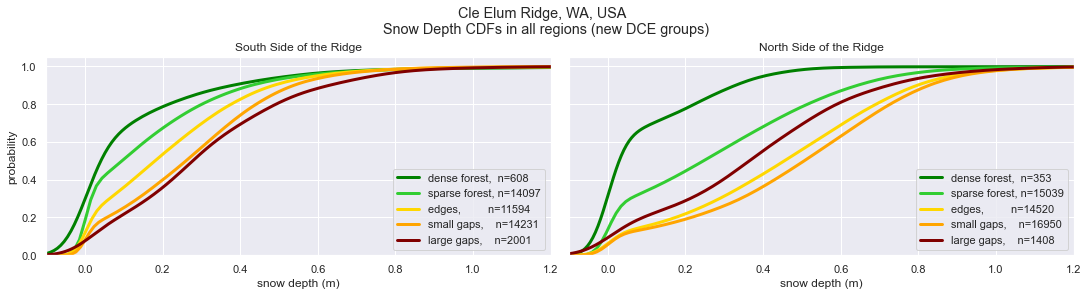

In [87]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_s'].values.flatten(), ax=axes[0], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_s'].values.flatten(), ax=axes[0], color='gold',      label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_2_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_s'].values.flatten(), ax=axes[0], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_s'].values.flatten(), ax=axes[0], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_n'].values.flatten(), ax=axes[1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_n'].values.flatten(), ax=axes[1], color='gold',      label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_2_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_n'].values.flatten(), ax=axes[1], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_n'].values.flatten(), ax=axes[1], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_500_n"]).size}', cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions (new DCE groups)')
axes[0].legend()
axes[1].legend()
axes[0].set_xlim(-0.1,1.2)
plt.show()

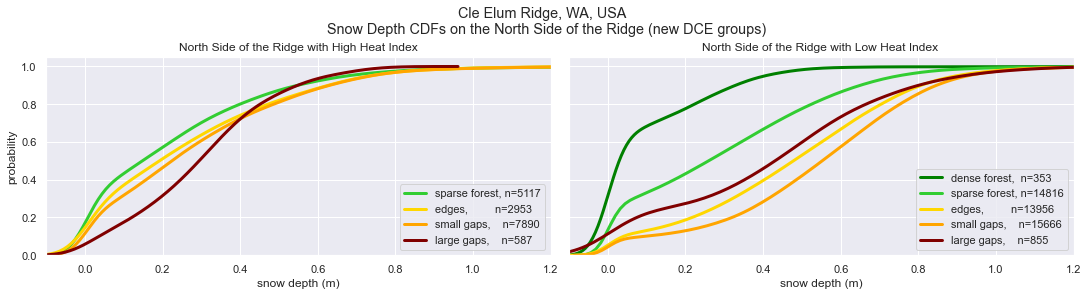

In [88]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the North Side of the Ridge (new DCE groups)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_n"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_n"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_2_300_n"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_400_n"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_500_n"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_n"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_n"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_2_300_n"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_400_n"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_500_n"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('North Side of the Ridge with High Heat Index')
axes[1].set_title('North Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')

axes[0].set_xlim(-0.1,1.2)
plt.show()

Let's look at the heat index sensitivtiy of each side of the ridge.

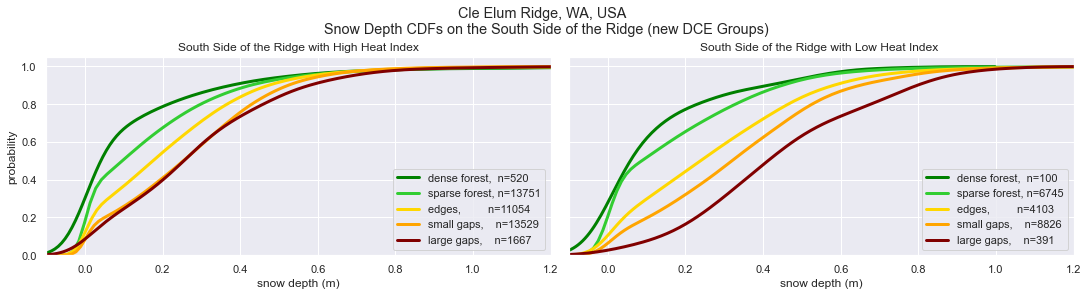

In [89]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the South Side of the Ridge (new DCE Groups)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_s"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_s"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_2_300_s"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_400_s"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_500_s"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_s"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_s"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_2_300_s"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_400_s"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_500_s"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge with High Heat Index')
axes[1].set_title('South Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
axes[0].set_xlim(-0.1,1.2)

plt.show()

Let's look only at the heat index, and not the side of the ridge...

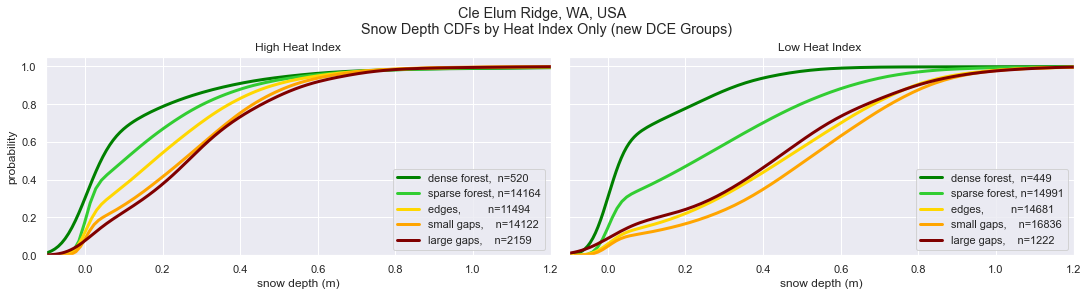

In [90]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs by Heat Index Only (new DCE Groups)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_2_100'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_2_300"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_400"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_500"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_2_100'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_2_300"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_400"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_2_500"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('High Heat Index')
axes[1].set_title('Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
axes[0].set_xlim(-0.1,1.2)
plt.show()

# Calculate the % Canopy Cover Metric

Let's go one baf at a time.

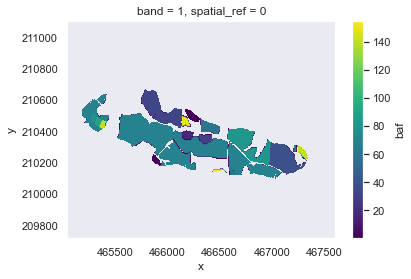

In [163]:
ds['baf'].plot()

In [177]:
# Define the canopy cover threshold
canopy_threshold = 2

# Determine the canopy grid cells
canopy_mask = ds['chmws_rapid'] > canopy_threshold

# Calculate the total number of canopy grid cells in the forest treatment area
baf_new_value = 1
treatment_area = ds['baf_new'].where(ds['baf_new'] == baf_new_value)
total_canopy_cells = np.sum(canopy_mask * treatment_area)

# Calculate the total number of grid cells in the forest treatment area
total_treatment_cells = np.sum(treatment_area)

# Calculate the percentage of canopy cover
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

print(f'Percentage of canopy cover in the forest treatment area: {percentage_canopy_cover.values}%')

Percentage of canopy cover in the forest treatment area: 64.73274827003479%


I created the code below, which is used in the large loop to do this for all the BAF. Compare the values to make sure everything is correct. 

In [178]:
BAF = 1
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 2
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 17
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 32
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')


Percentage of canopy cover in the forest treatment area for BAF 1: 64.73274827003479%
Percentage of canopy cover in the forest treatment area for BAF 2: 95.09132504463196%
Percentage of canopy cover in the forest treatment area for BAF 17: 29.30718958377838%
Percentage of canopy cover in the forest treatment area for BAF 32: 59.14224982261658%


In [156]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              64              55              47
1     2              95              93              91
2    17              29              23              18
3    30              34              30              27
4    32              59              53              49
5    38              45              42              39
6    60              51              48              45
7    69              56              53              50
8    80              53              47              44
9    82              65              62              58
10   90              58              56              54
11  140              67              64              60
12  150              99              99              98
13  155              91              89              87


In [157]:
df.dtypes

BAF                 int64
canopy_cover_2m    object
canopy_cover_3m    object
canopy_cover_4m    object
dtype: object

In [158]:
# change the type to integer for all columns 
df = df.astype(int)

In [159]:
df.canopy_cover_2m.dtype

dtype('int32')

In [160]:
df.dtypes

BAF                int32
canopy_cover_2m    int32
canopy_cover_3m    int32
canopy_cover_4m    int32
dtype: object

In [161]:
df

BAF  canopy_cover_2m  canopy_cover_3m  canopy_cover_4m
0     1               64               55               47
1     2               95               93               91
2    17               29               23               18
3    30               34               30               27
4    32               59               53               49
5    38               45               42               39
6    60               51               48               45
7    69               56               53               50
8    80               53               47               44
9    82               65               62               58
10   90               58               56               54
11  140               67               64               60
12  150               99               99               98
13  155               91               89               87

Text(0.5, 1.0, 'threshold for 2m')

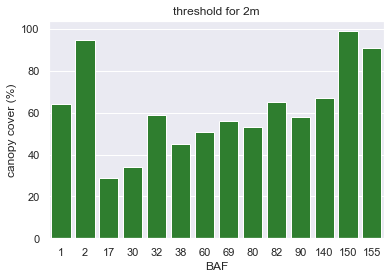

In [162]:
# Now, plot these to compare. 
sns.barplot(data=df, x='BAF', y='canopy_cover_2m', color='forestgreen', label='2m')
plt.ylabel('canopy cover (%)')
plt.title('threshold for 2m')

In [163]:
# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2 = pd.melt(df, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

In [164]:
df2.head()

BAF        threshold  canopy_cover
0    1  canopy_cover_2m            64
1    2  canopy_cover_2m            95
2   17  canopy_cover_2m            29
3   30  canopy_cover_2m            34
4   32  canopy_cover_2m            59

Text(0.5, 1.0, 'percentage of canopy cover in each treatment (with 2m, 3m, and 4m canopy height thresholds)')

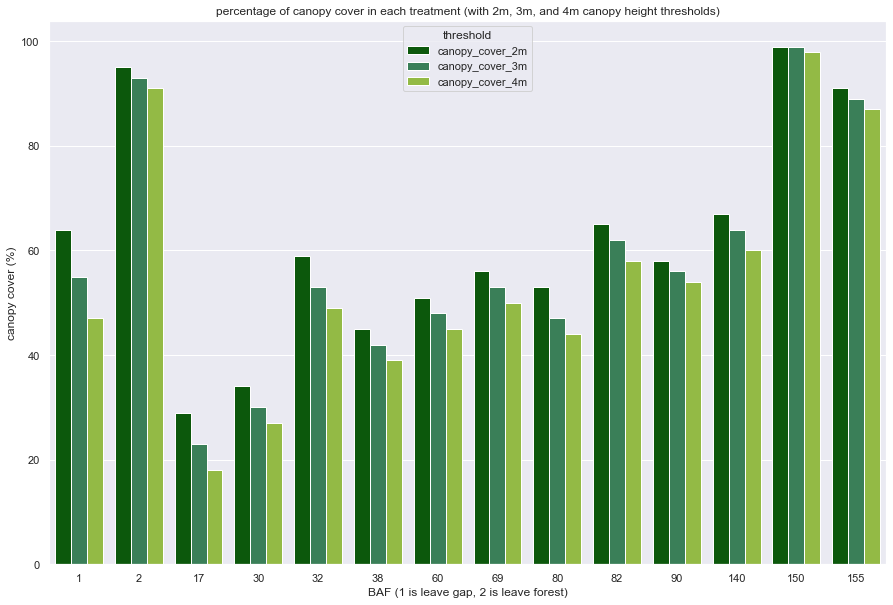

In [165]:
# increase figure size
fig = plt.figure(figsize=(15, 10))
color='forestgreen'
palette=['darkgreen', 'seagreen', 'yellowgreen']

# sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', color='green')

sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('canopy cover (%)')
plt.title('percentage of canopy cover in each treatment (with 2m, 3m, and 4m canopy height thresholds)')

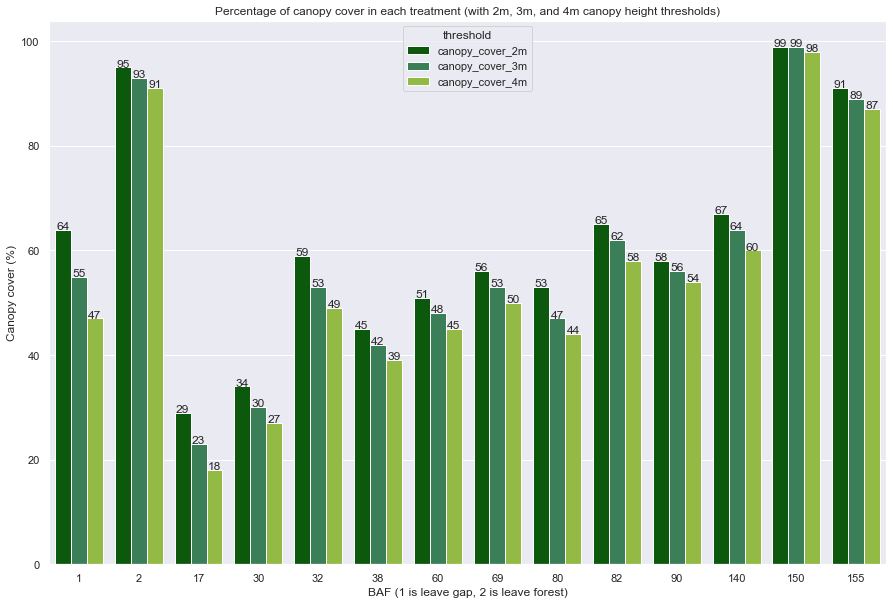

In [166]:
fig = plt.figure(figsize=(15, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

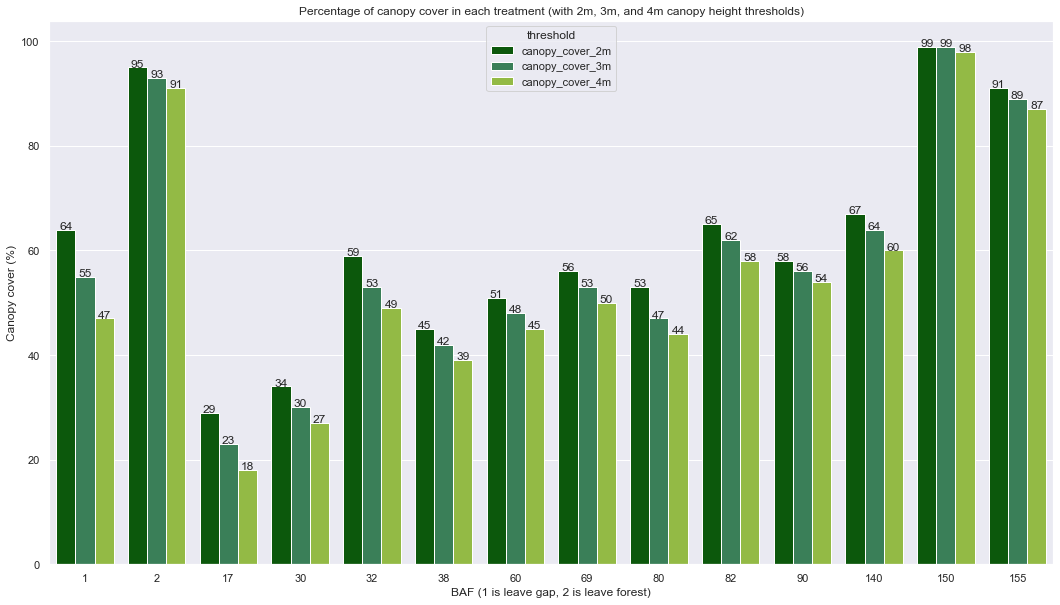

In [167]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

## Now, we want to get % canopy cover for before the treatments too

In [168]:
# Initialize the DataFrame
df_pre = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df_pre['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df_pre.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df_pre)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              55              40              26
1     2              98              95              93
2    17              40              23              13
3    30              34              27              24
4    32              95              93              90
5    38              95              93              92
6    60              83              78              75
7    69              80              74              70
8    80              98              95              90
9    82              90              87              84
10   90              98              96              94
11  140              75              70              65
12  150              99              99              99
13  155              93              88              86


In [169]:
# change the type to integer for all columns 
df_pre = df_pre.astype(int)

# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2_pre = pd.melt(df_pre, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

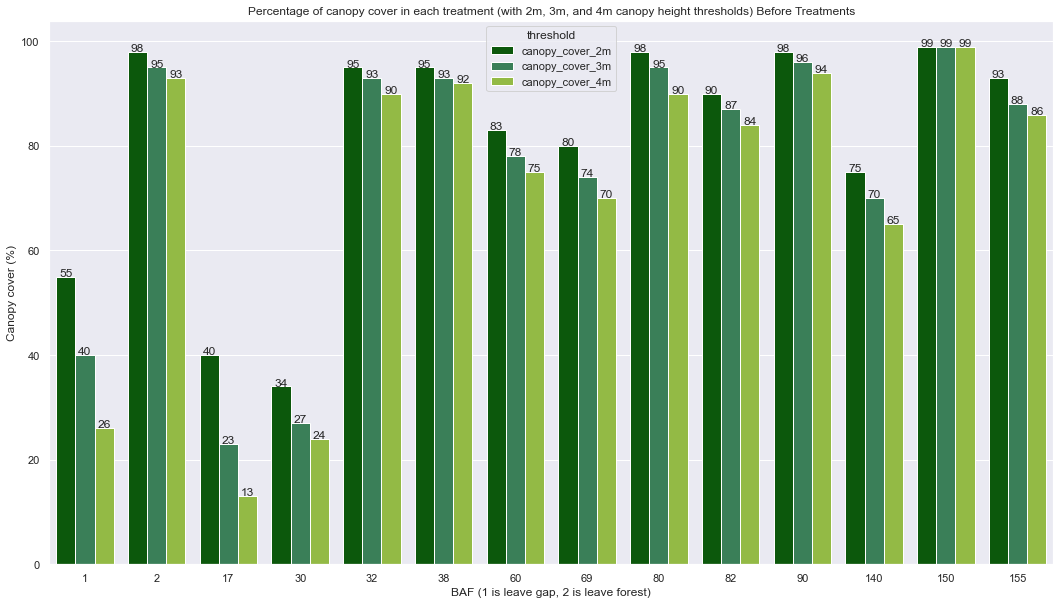

In [170]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2_pre, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds) Before Treatments')

plt.show()

Now, merge the df2 and df2_pre with only the 2m threshold to then compare on one plot

In [179]:
# for both datasets, only save for 2m threshold 
df2_pre = df2_pre[df2_pre['threshold'] == 'canopy_cover_2m']
df2_pos = df2[df2['threshold'] == 'canopy_cover_2m']

In [180]:
# Now merge df2_pos and df2_pre and create a new column to determine pre and pos 
df2_pre['treatment'] = 'pre'
df2_pos['treatment'] = 'post'

df2_all = pd.concat([df2_pre, df2_pos])
df2_all.head()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_18248\4030389355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_pos['treatment'] = 'post'


BAF        threshold  canopy_cover treatment
0    1  canopy_cover_2m            55       pre
1    2  canopy_cover_2m            98       pre
2   17  canopy_cover_2m            40       pre
3   30  canopy_cover_2m            34       pre
4   32  canopy_cover_2m            95       pre

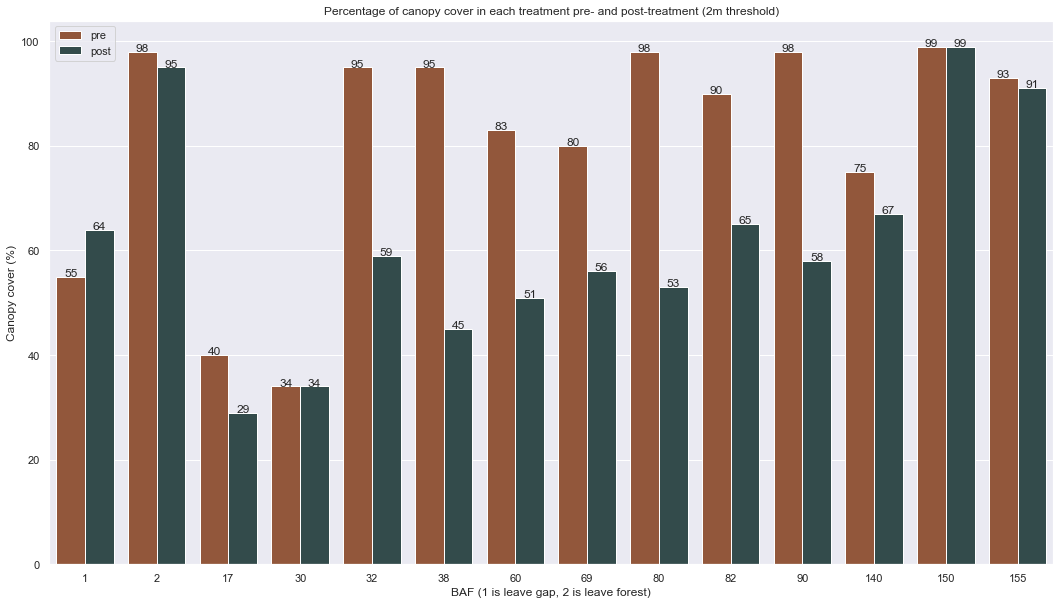

In [182]:
fig = plt.figure(figsize=(18, 10))
palette = [colorpre, colorpos]

# Create a barplot with values
barplot = sns.barplot(data=df2_all, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment pre- and post-treatment (2m threshold)')
plt.legend(loc='upper left')

plt.show()